In [1]:
pip install opencv-python opencv-contrib-python

  Using cached opencv_python-4.10.0.84-cp37-abi3-win_amd64.whl.metadata (20 kB)
  Using cached opencv_contrib_python-4.10.0.84-cp37-abi3-win_amd64.whl.metadata (20 kB)
Using cached opencv_python-4.10.0.84-cp37-abi3-win_amd64.whl (38.8 MB)
Using cached opencv_contrib_python-4.10.0.84-cp37-abi3-win_amd64.whl (45.5 MB)
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import os

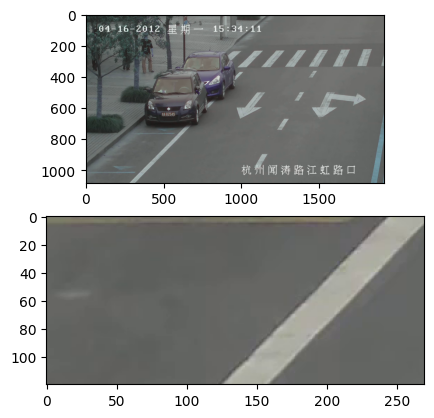

error: OpenCV(4.10.0) D:\a\opencv-python\opencv-python\opencv\modules\highgui\src\window.cpp:973: error: (-215:Assertion failed) size.width>0 && size.height>0 in function 'cv::imshow'


In [5]:
def objectTracking():
    #ĐỌC ẢNH FRAME
    root = os.getcwd()
    videopath = os.path.join(root,r'C:\Users\diept\Downloads\Traffic IP Camera video.mp4')
    videoCap = cv2.VideoCapture(videopath)
    _,frame = videoCap.read()

    #vẽ first frame 
    plt.figure()
    plt.subplot(211)
    plt.imshow(frame)

    #Xác định khu vực để tracking
    xTopleft = 350
    yTopleft = 760
    w =270
    h = 120
    windowTracker = (xTopleft,yTopleft,w,h)
    imgRegion = frame[yTopleft:yTopleft+h,xTopleft:xTopleft+w]
    plt.subplot(212)
    plt.imshow(cv2.cvtColor(imgRegion, cv2.COLOR_BGR2RGB))
    plt.show()

    #Khoanh vùng để track dựa trên hsv color
    hsvImgRegion = cv2.cvtColor(imgRegion,cv2.COLOR_BGR2HSV)
    hsvLowerLimit = np.array([18/360*2,200,0])
    hsvUpperLimit = np.array([22/360*2,255,255])
    mask = cv2.inRange(hsvImgRegion, hsvLowerLimit, hsvUpperLimit)
    histImgRegion = cv2.calcHist([hsvImgRegion],[0],mask,[180],[0,180])
    cv2.normalize(histImgRegion,histImgRegion,0,255,cv2.NORM_MINMAX)
    termCrit = (cv2.TERM_CRITERIA_EPS|cv2.TERM_CRITERIA_COUNT,10,1)
    color = (144, 238, 144)

    #Chạy qua từng frame trong video và track object
    while True : 
        ret,videoFrame = videoCap.read()
        if ret == True : 
            hsv = cv2.cvtColor(videoFrame,cv2.COLOR_BGR2HSV)
            imgBackProj = cv2.calcBackProject([hsv],[0],histImgRegion,[0,180],1)
            _,windowTracker = cv2.meanShift(imgBackProj,windowTracker,termCrit)
            xTopleft,yTopleft,w,h = windowTracker
            videoFrame = cv2.rectangle(videoFrame,(xTopleft,yTopleft),(xTopleft+w,yTopleft+h),color,2)
        
       

        cv2.imshow('video',videoFrame)
        cv2.waitKey(15)

if __name__ == '__main__':
    objectTracking()





